In [ ]:
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score


from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping

from keras.datasets import fashion_mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


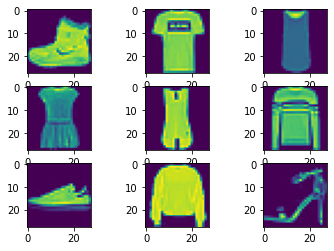

In [ ]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()

In [ ]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255 # chuyển về dạng array
x_test /=255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) (10000, 10)


In [ ]:
model_im = Sequential()
model_im.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape = (28,28,1)))
model_im.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model_im.add(Flatten())
model_im.add(Dense(100,activation = 'relu', kernel_initializer='he_uniform'))
model_im.add(Dense(10,activation = 'softmax'))
model_im.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_30 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dense_12 (Dense)            (None, 100)               2508900   
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 2,519,478
Trainable params: 2,519,478
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = SGD(lr=0.01,momentum=0.9) #toc do hoc 0.01, momen dong luong 0.9
model_im.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
print(x_train.shape,x_test.shape,y_test.shape,y_train.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (10000, 10) (60000, 10)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history=model_im.fit(x_train,y_train,batch_size=32,epochs=3,verbose=1,validation_data=(x_test,y_test))

Epoch 1/3
1875/1875 [==============================] - 155s 82ms/step - loss: 0.1519 - accuracy: 0.9438 - val_loss: 0.2800 - val_accuracy: 0.9073
Epoch 2/3
1875/1875 [==============================] - 158s 84ms/step - loss: 0.1189 - accuracy: 0.9558 - val_loss: 0.2944 - val_accuracy: 0.9033
Epoch 3/3
1875/1875 [==============================] - 155s 83ms/step - loss: 0.0885 - accuracy: 0.9678 - val_loss: 0.3140 - val_accuracy: 0.9069


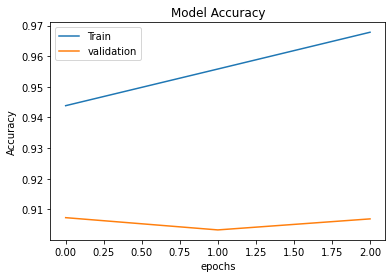

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [ ]:
model_im.save('fashion_mnist_final.h5')

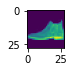

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


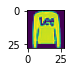

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


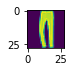

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


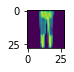

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


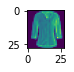

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


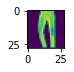

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


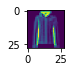

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


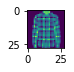

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


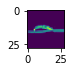

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


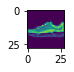

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255 # chuyển về dạng array
x_test /=255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_predict = model_im.predict(x_test)
for i in range(0,10):
  plt.subplot(5,5,i+1)
  plt.imshow(x_test[i])
  plt.show()
  print(np.round(y_predict[i]))